In [15]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to path:", project_root)

Project root added to path: c:\Users\VictorJohnson\Downloads\VJP\customer-segmentation-tool


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_generator import generate_customer_data
from src.clustering import run_kmeans
from src.visualization import apply_pca

In [17]:
df = generate_customer_data(200)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,49,65.53,46.00
1,2,Female,56,76.54,63.13
2,3,Male,66,60.26,58.85
3,4,Male,69,89.07,90.21
4,5,Male,49,54.71,5.50


In [18]:
clustered_df, model = run_kmeans(df, n_clusters=5)
clustered_df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,1,49,65.53,46.00,0
1,2,0,56,76.54,63.13,2
2,3,1,66,60.26,58.85,4
3,4,1,69,89.07,90.21,4
4,5,1,49,54.71,5.50,0


In [19]:
reduced_df, pca = apply_pca(clustered_df)
reduced_df.head()


PCA applied successfully!
Explained variance ratio: [0.601 0.235]


,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,PCA1,PCA2
0,1,1,49,65.53,46.00,0,-3.317224,3.766326
1,2,0,56,76.54,63.13,2,13.016810,16.725255
2,3,1,66,60.26,58.85,4,11.392298,0.308828
3,4,1,69,89.07,90.21,4,39.533296,32.410969
4,5,1,49,54.71,5.50,0,-42.242690,-11.379813


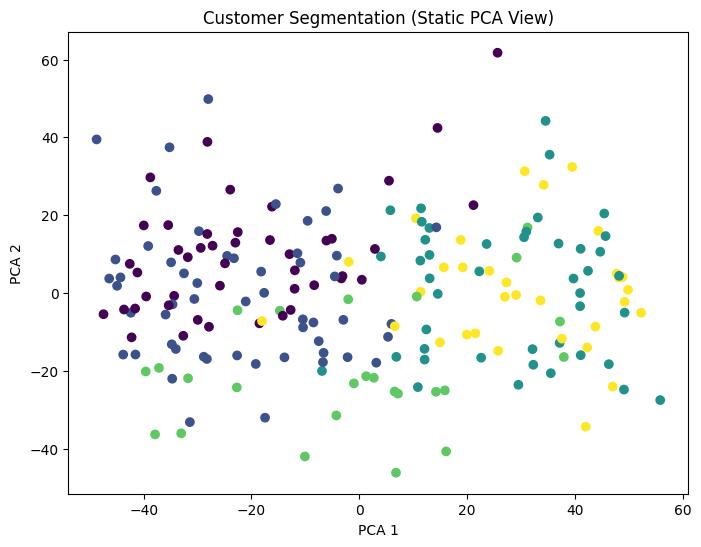

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=reduced_df['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation (Static PCA View)')
plt.show()


In [21]:
cluster_summary = clustered_df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean().round(1)
cluster_summary


,Age,AnnualIncome,SpendingScore
Cluster,,,
0,43.1,73.2,29.6
1,41.5,63.9,27.6
2,51.2,59.5,76.6
3,26.6,42.2,47.0
4,55.7,58.6,77.8


Observations

Cluster 0: Younger, higher spending

Cluster 1: Older, lower spending

Cluster 2: Mid-income high-score customers